# Atividade 01

# Métodos hierárquicos de agrupamento - Tarefa

In [5]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import prettytable
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

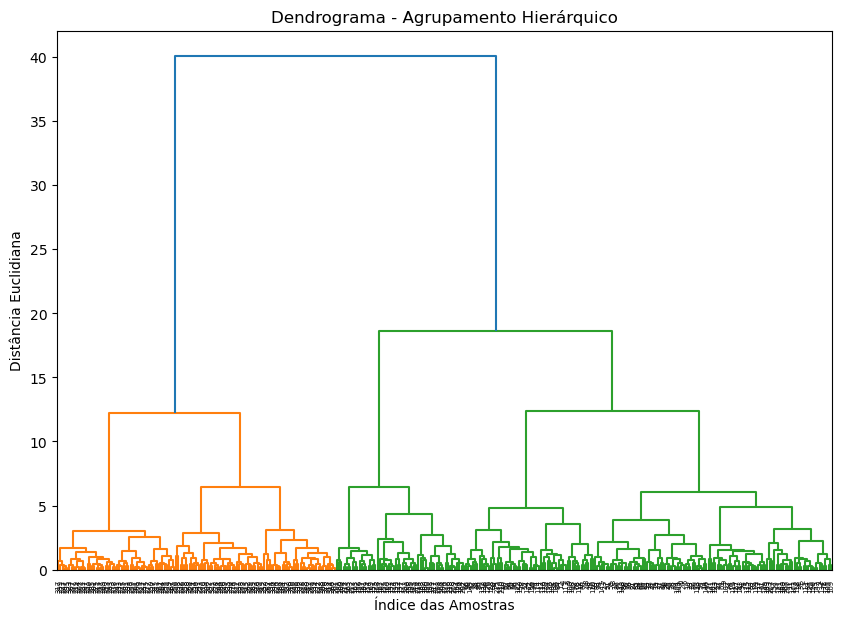

In [6]:
# Carregando o conjunto de dados de pinguins
peng = sns.load_dataset('penguins')

# Eliminando valores faltantes no DataFrame original
peng = peng.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Selecionando apenas as variáveis quantitativas
peng_num = peng[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Padronizando as variáveis para média zero e desvio padrão 1
scaler = StandardScaler()
peng_scaled = scaler.fit_transform(peng_num)

# Fazendo um agrupamento hierárquico dividindo a base em 3 grupos
clus = AgglomerativeClustering(n_clusters=3)
labels = clus.fit_predict(peng_scaled)

# Adicionando os rótulos de cluster ao DataFrame original
peng['cluster'] = labels

# Fazendo o Dendrograma
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(peng_scaled, method='ward'))
plt.title("Dendrograma - Agrupamento Hierárquico")
plt.xlabel("Índice das Amostras")
plt.ylabel("Distância Euclidiana")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
# Quantidade de pinguins de cada espécie em cada grupo
species_counts = peng.groupby(['cluster', 'species']).size().reset_index().rename(columns={0:'count'})
species_counts_table = prettytable.PrettyTable()
species_counts_table.field_names = species_counts.columns.tolist()
species_counts_table.title = "Contagem de Pinguins por Espécie e Grupo"
species_counts_table.align["species"] = "l"
species_counts_table.align["count"] = "r"
for row in species_counts.itertuples(index=False):
    species_counts_table.add_row(row)
print(species_counts_table)
print()

# Descrevendo as variáveis quantitativas de cada grupo
group_stats = peng.groupby('cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
group_stats_table = prettytable.PrettyTable()
group_stats_table.field_names = ["Cluster"] + [f"{col[0]} {col[1]}" for col in group_stats.columns]
group_stats_table.title = "Estatísticas Descritivas por Grupo"
group_stats_table.float_format = "1.2"
for cluster, row in group_stats.iterrows():
    row_values = [cluster] + [f"{v:.2f}" if pd.notna(v) else "-" for v in row]
    group_stats_table.add_row(row_values)
print(group_stats_table)
print()

+------------------------------------------+
| Contagem de Pinguins por Espécie e Grupo |
+-------------+----------------+-----------+
|   cluster   | species        |     count |
+-------------+----------------+-----------+
|      0      | Adelie         |       151 |
|      0      | Chinstrap      |        11 |
|      1      | Gentoo         |       123 |
|      2      | Chinstrap      |        57 |
+-------------+----------------+-----------+

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|              

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [8]:
# Realizando o agrupamento hierárquico com 5 clusters
clus5 = AgglomerativeClustering(n_clusters=5)
labels5 = clus5.fit_predict(peng_scaled)
peng['cluster5'] = labels5

# Contando pinguins de cada espécie por grupo (5 clusters)
species_count5 = peng.groupby(['cluster5', 'species']).size().reset_index().rename(columns={0:'count'})
species_count5_table = prettytable.PrettyTable()
species_count5_table.field_names = species_count5.columns.tolist()
species_count5_table.title = "Contagem de Pinguins de cada Espécie por Grupo (5 Clusters)"
species_count5_table.align["species"] = "l"
species_count5_table.align["count"] = "r"
for row in species_count5.itertuples(index=False):
    species_count5_table.add_row(row)
print(species_count5_table)
print()

# Contando pinguins de cada espécie e sexo por grupo (5 clusters)
species_sex_count5 = peng.groupby(['cluster5', 'species', 'sex']).size().reset_index().rename(columns={0:'count'})
species_sex_count5_table = prettytable.PrettyTable()
species_sex_count5_table.field_names = species_sex_count5.columns.tolist()
species_sex_count5_table.title = "Contagem de Pinguins de cada Espécie e Sexo por Grupo (5 Clusters)"
species_sex_count5_table.align["species"] = "l"
species_sex_count5_table.align["sex"] = "l"
species_sex_count5_table.align["count"] = "r"
for row in species_sex_count5.itertuples(index=False):
    species_sex_count5_table.add_row(row)
print(species_sex_count5_table)
print()

+-------------------------------------------------------------+
| Contagem de Pinguins de cada Espécie por Grupo (5 Clusters) |
+---------------------+-----------------------+---------------+
|       cluster5      | species               |         count |
+---------------------+-----------------------+---------------+
|          0          | Gentoo                |            71 |
|          1          | Adelie                |            97 |
|          1          | Chinstrap             |             8 |
|          2          | Chinstrap             |            57 |
|          3          | Adelie                |            54 |
|          3          | Chinstrap             |             3 |
|          4          | Gentoo                |            52 |
+---------------------+-----------------------+---------------+

+--------------------------------------------------------------------+
| Contagem de Pinguins de cada Espécie e Sexo por Grupo (5 Clusters) |
+------------------+-----

- O agrupamento com 5 clusters parece expressar melhor a estrutura natural dos dados em comparação com 3 clusters e captura padrões interessantes relacionados à espécie e ao sexo dos pinguins;

- Dentro de cada espécie, também há uma separação por sexo em alguns clusters, sugerindo diferenças morfológicas entre machos e fêmeas.